<h1 style="text-align:center;font-size:50px;color:white;border:1px solid black;border-radius:6px;padding:70px;background:linear-gradient(to right,#1BFFFF,#2E3192,#FC5C65);text-shadow:0px 0px 10px black;">Pandas Tutorials</h1>
<div style="margin:50px 0px;">
    <p style="text-align:center;font-size:30px">Guilan University<br>2023 - 2024</p>
    <p style="text-align:center;font-size:20px"><b>Supervisor</b><br>Dr Sadegh Eskandari</p>
    <p style="text-align:center;font-size:20px"><b>Created by</b><br>Alireza Sheikhiy & Athena Hassani</p>
</div>

<h2 style="text-align:center;font-size:30px;border-top:1px dashed black;padding-top:20px">Table of Contents</h2>
<ol style="font-size:18px;border:1px dashed black;padding:20px 40px;">
      <li><a href="#1">Series</a></li>
      <li><a href="#2">DataFrames</a></li>
      <li><a href="#3">DataFrames and Series useful functions</a></li>
      <li><a href="#4">Selecting</a></li>
      <li><a href="#5">Insertion</a></li>
      <li><a href="#6">Updating</a></li>
      <li><a href="#7">Removing</a></li>
      <li><a href="#8">Sorting</a></li>
      <li><a href="#9">Missing Data</a></li>
      <li><a href="#10">Multi Indexing (Advanced Indexing)</a></li>
      <li><a href="#11">Reshaping and Pivot Tables</a></li>
      <li><a href="#12">Combining Series and Dataframes</a></li>
      <li><a href="#13">Duplicate Labels</a></li>
      <li><a href="#14">Data Mapping</a></li>
      <li><a href="#15">Grouping</a></li>
      <li><a href="#16">I/O Tools</a></li>
      <li><a href="#17">The str accessor and string methods</a></li>
      <li><a href="#18">Options and Settings</a></li>
    </ol>

<ul><li style="color:#218c74;font-size:20px">Import Numpy and Pandas libraries</li></ul>

In [2]:
import numpy as np
import pandas as pd

<p id="1" style="font-size:20px;color:white;padding:10px;background:linear-gradient(to right,#0652DD,transparent);text-shadow:0px 0px 5px black;"><b>1. Series</b></p>

<ul><li style="color:#218c74;font-size:20px">Create a serie using numpy</li></ul>

In [2]:
pd.Series(np.random.rand(7).round(2))

0    0.47
1    0.32
2    0.67
3    0.52
4    0.73
5    0.73
6    0.40
dtype: float64

<ul><li style="color:#218c74;font-size:20px">Create a serie using python list</li></ul>

In [3]:
pd.Series([10, 15, np.nan, 25])

0    10.0
1    15.0
2     NaN
3    25.0
dtype: float64

<ul><li style="color:#218c74;font-size:20px">Create a serie using python dictionary</li></ul>

In [4]:
pd.Series({"A":111, "B":222, "C":333})

A    111
B    222
C    333
dtype: int64

<ul><li style="color:#218c74;font-size:20px">We can choose the name, index and datatype of series</li></ul>

In [52]:
pd.Series(np.random.rand(5).round(2), name="newSerie", index=list("ABCDE"), dtype="float32")

A    0.68
B    0.41
C    0.12
D    0.42
E    0.89
Name: newSerie, dtype: float32

<ul><li style="color:#218c74;font-size:20px">Create a time serie using pandas date and time methods</li></ul>

In [6]:
pd.Series(pd.date_range("20200101", periods=10, freq="7D"))

0   2020-01-01
1   2020-01-08
2   2020-01-15
3   2020-01-22
4   2020-01-29
5   2020-02-05
6   2020-02-12
7   2020-02-19
8   2020-02-26
9   2020-03-04
dtype: datetime64[ns]

<p id="2" style="font-size:20px;color:white;padding:10px;background:linear-gradient(to right,#0652DD,transparent);text-shadow:0px 0px 5px black;"><b>2. DataFrames</b></p>

<ul><li style="color:#218c74;font-size:20px">Create a dataframe</li></ul>

In [7]:
df = pd.DataFrame(np.random.randn(4,6).round(2), index=pd.date_range("20180521", periods=4), columns=list("ABCDEF"))
df

,A,B,C,D,E,F
2018-05-21,-0.18,0.37,0.11,0.56,-0.93,0.61
2018-05-22,-0.78,-0.42,1.41,0.13,0.41,0.15
2018-05-23,-0.58,-0.31,-0.65,-0.62,-2.79,1.10
2018-05-24,-0.21,-1.05,0.37,0.80,1.59,0.06


<ul><li style="color:#218c74;font-size:20px">Create a dataframe using series concatenation</li></ul>

In [8]:
A = pd.Series(np.random.rand(5).round(2)).to_frame()
B = pd.Series(pd.date_range("20230710", periods=5)).to_frame()
C = pd.Series(["A1", "B1", "C1", "D1", "E1"]).to_frame()

df = pd.concat([A,B,C], axis=1)

# df = pd.concat({"X" : A, "Y" : B, "Z" : C}, axis=1)

df.columns = ["X", "Y", "Z"]

df.index = list("abcde")

df

,X,Y,Z
a,0.96,2023-07-10,A1
b,0.05,2023-07-11,B1
c,0.38,2023-07-12,C1
d,0.89,2023-07-13,D1
e,0.46,2023-07-14,E1


<ul><li style="color:#218c74;font-size:20px">Read a csv file and convert it to dataframe</li></ul>

In [3]:
path = "../datasets/data_nike_vs_addidas_unsupervised.csv"
df = pd.read_csv(path)
df.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72


<p id="3" style="font-size:20px;color:white;padding:10px;background:linear-gradient(to right,#0652DD,transparent);text-shadow:0px 0px 5px black;"><b>3. DataFrames and Series useful functions</b></p>

<ul><li style="color:#218c74;font-size:20px">Show first 5 records of dataframe</li></ul>

In [10]:
df.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72


<ul><li style="color:#218c74;font-size:20px">Show first n records of dataframe</li></ul>

In [11]:
df.head(3)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37


<ul><li style="color:#218c74;font-size:20px">Show last 5 records of dataframe</li></ul>

In [12]:
df.tail()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,5.0,1
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,0.0,0
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,5.0,1
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,4.0,4
3267,Nike P-6000 SE,CJ9585-600,8995,6297,0,Nike,0.0,0


<ul><li style="color:#218c74;font-size:20px">Show last n records of dataframe</li></ul>

In [13]:
df.tail(3)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,5.0,1
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,4.0,4
3267,Nike P-6000 SE,CJ9585-600,8995,6297,0,Nike,0.0,0


<ul><li style="color:#218c74;font-size:20px">Show a record as a sample by random</li></ul>

In [14]:
df.sample()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
2875,Nike SB Zoom Stefan Janoski Mid RM,AT7324-001,7995,6397,0,Nike,5.0,1


<ul><li style="color:#218c74;font-size:20px">Show n records as samples by random</li></ul>

In [15]:
df.sample(3)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
1308,Women's adidas Running Alphabounce+ Parley Shoes,G28373,8999,5399,40,Adidas SPORT PERFORMANCE,3.5,22
1718,MEN'S ADIDAS SPORT INSPIRED CLOUDFOAM LITE RAC...,B44736,5999,2999,50,Adidas CORE / NEO,4.2,81
3236,Nike Daybreak,CQ7620-001,0,9995,0,Nike,0.0,0


<ul><li style="color:#218c74;font-size:20px">Print some informations about dataframe</li></ul>

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Rating         3268 non-null   float64
 7   Reviews        3268 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 204.4+ KB


<ul><li style="color:#218c74;font-size:20px">Show some statistical informations about dataframe</li></ul>

In [17]:
df.describe()

,Listing Price,Sale Price,Discount,Rating,Reviews
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,6868.020196,6134.265606,26.875765,3.242105,40.551714
std,4724.659386,4293.247581,22.633487,1.428856,31.543491
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4299.000000,2999.000000,0.000000,2.600000,10.000000
50%,5999.000000,4799.000000,40.000000,3.500000,37.000000
75%,8999.000000,7995.000000,50.000000,4.400000,68.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


In [18]:
df.describe(include="all")

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
count,3268,3268,3268.000000,3268.000000,3268.000000,3268,3268.000000,3268.000000
unique,1531,3179,NaN,NaN,NaN,5,NaN,NaN
top,Women's adidas Originals Sambarose Shoes,CD6720-808,NaN,NaN,NaN,Adidas CORE / NEO,NaN,NaN
freq,16,3,NaN,NaN,NaN,1111,NaN,NaN
mean,NaN,NaN,6868.020196,6134.265606,26.875765,NaN,3.242105,40.551714
std,NaN,NaN,4724.659386,4293.247581,22.633487,NaN,1.428856,31.543491
min,NaN,NaN,0.000000,449.000000,0.000000,NaN,0.000000,0.000000
25%,NaN,NaN,4299.000000,2999.000000,0.000000,NaN,2.600000,10.000000
50%,NaN,NaN,5999.000000,4799.000000,40.000000,NaN,3.500000,37.000000
75%,NaN,NaN,8999.000000,7995.000000,50.000000,NaN,4.400000,68.000000


<ul><li style="color:#218c74;font-size:20px">Get the number of records and columns</li></ul>

In [19]:
df.shape

(3268, 8)

<ul><li style="color:#218c74;font-size:20px">Get the number of cells</li></ul>

In [20]:
df.size

26144

<ul><li style="color:#218c74;font-size:20px">Get the list of indexes </li></ul>

In [21]:
df.index

RangeIndex(start=0, stop=3268, step=1)

<ul><li style="color:#218c74;font-size:20px">Get the list of columns title</li></ul>

In [22]:
df.columns

Index(['Product Name', 'Product ID', 'Listing Price', 'Sale Price', 'Discount',
       'Brand', 'Rating', 'Reviews'],
      dtype='object')

<ul><li style="color:#218c74;font-size:20px">Convert dataframe to numpy array</li></ul>

In [23]:
df.values
df.to_numpy()
np.asarray(df)

array([["Women's adidas Originals NMD_Racer Primeknit Shoes", 'AH2430',
        14999, ..., 'Adidas Adidas ORIGINALS', 4.8, 41],
       ["Women's adidas Originals Sleek Shoes", 'G27341', 7599, ...,
        'Adidas ORIGINALS', 3.3, 24],
       ["Women's adidas Swim Puka Slippers", 'CM0081', 999, ...,
        'Adidas CORE / NEO', 2.6, 37],
       ...,
       ['Nike Mercurial Superfly 7 Academy TF', 'AT7978-414', 8495, ...,
        'Nike', 5.0, 1],
       ['Nike Air Max 98', 'AH6799-300', 0, ..., 'Nike', 4.0, 4],
       ['Nike P-6000 SE', 'CJ9585-600', 8995, ..., 'Nike', 0.0, 0]],
      dtype=object)

<ul><li style="color:#218c74;font-size:20px">Print all dataframe items</li></ul>

In [24]:
df.items

<bound method DataFrame.items of                                            Product Name  Product ID  \
0     Women's adidas Originals NMD_Racer Primeknit S...      AH2430   
1                  Women's adidas Originals Sleek Shoes      G27341   
2                     Women's adidas Swim Puka Slippers      CM0081   
3      Women's adidas Sport Inspired Questar Ride Shoes      B44832   
4              Women's adidas Originals Taekwondo Shoes      D98205   
...                                                 ...         ...   
3263                                 Air Jordan 8 Retro  CI1236-100   
3264                         Nike Phantom Venom Club IC  AO0578-717   
3265               Nike Mercurial Superfly 7 Academy TF  AT7978-414   
3266                                    Nike Air Max 98  AH6799-300   
3267                                     Nike P-6000 SE  CJ9585-600   

      Listing Price  Sale Price  Discount                    Brand  Rating  \
0             14999        7499     

<ul><li style="color:#218c74;font-size:20px">Convert dataframe to a string</li></ul>

In [25]:
df.to_string()

"                                                                   Product Name  Product ID  Listing Price  Sale Price  Discount                     Brand  Rating  Reviews\n0                            Women's adidas Originals NMD_Racer Primeknit Shoes      AH2430          14999        7499        50   Adidas Adidas ORIGINALS     4.8       41\n1                                          Women's adidas Originals Sleek Shoes      G27341           7599        3799        50          Adidas ORIGINALS     3.3       24\n2                                             Women's adidas Swim Puka Slippers      CM0081            999         599        40         Adidas CORE / NEO     2.6       37\n3                              Women's adidas Sport Inspired Questar Ride Shoes      B44832           6999        3499        50         Adidas CORE / NEO     4.1       35\n4                                      Women's adidas Originals Taekwondo Shoes      D98205           7999        3999        50      

<ul><li style="color:#218c74;font-size:20px">Show dataframe columns or series datatype</li></ul>

In [26]:
df["Listing Price"].dtype

dtype('int64')

In [27]:
df.dtypes

Product Name      object
Product ID        object
Listing Price      int64
Sale Price         int64
Discount           int64
Brand             object
Rating           float64
Reviews            int64
dtype: object

<ul><li style="color:#218c74;font-size:20px">Changing datatypes of series and dataframes</li></ul>

In [28]:
df["Listing Price"].astype("string").dtype

string[python]

In [29]:
df.astype({"Listing Price":"float64", "Sale Price":"float32"}).dtypes

Product Name      object
Product ID        object
Listing Price    float64
Sale Price       float32
Discount           int64
Brand             object
Rating           float64
Reviews            int64
dtype: object

<ul><li style="color:#218c74;font-size:20px">Transpose the dataframe</li></ul>

In [56]:
df.head(3).T

,0,1,2
Product Name,Women's adidas Originals NMD_Racer Primeknit S...,Women's adidas Originals Sleek Shoes,Women's adidas Swim Puka Slippers
Product ID,AH2430,G27341,CM0081
Listing Price,14999,7599,999
Sale Price,7499,3799,599
Discount,50,50,40
Brand,Adidas Adidas ORIGINALS,Adidas ORIGINALS,Adidas CORE / NEO
Rating,4.8,3.3,2.6
Reviews,41,24,37


<ul><li style="color:#218c74;font-size:20px">Some useful statistical methods</li></ul>

In [65]:
# df.mean()
# df.median()
# df.std()
# df.sum()
# df.count()
# df.mode()
# df.cov()
# df.var()
# df.abs()
# df.cumsum()
# df.cumprod()

<ul><li style="color:#218c74;font-size:20px">Some useful arithmetic operational methods</li></ul>

In [32]:
df["Sale Price"].add(10)
# df["Sale Price"].sub(10)
# df["Sale Price"].mul(10)
# df["Sale Price"].div(10)
# df["Sale Price"].radd(10)
# df["Sale Price"].rsub(10)
# df["Sale Price"].rmul(10)
# df["Sale Price"].rdiv(10)
# div, rem = df["Sale Price"].divmod(10)

0        7509
1        3809
2         609
3        3509
4        4009
        ...  
3263    12807
3264     3507
3265     5957
3266    17005
3267     6307
Name: Sale Price, Length: 3268, dtype: int64

<ul><li style="color:#218c74;font-size:20px">Create a copy from a dataframe</li></ul>

In [33]:
copied_df = df.copy() # copied_df = df   --->   deep = True
copied_df.head()
# copied_df = df.copy(deep=False)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72


<ul><li style="color:#218c74;font-size:20px">Check if a subvalue is in a dataframe or serie records</li></ul>

In [61]:
df["Brand"].isin(["Adidas ORIGINALS"])

0       False
1        True
2       False
3       False
4        True
        ...  
3263    False
3264    False
3265    False
3266    False
3267    False
Name: Brand, Length: 3268, dtype: bool

<ul><li style="color:#218c74;font-size:20px">Count the repeatition of all values in a dataframe or serie</li></ul>

In [35]:
df["Brand"].value_counts()

Brand
Adidas CORE / NEO           1111
Adidas ORIGINALS             907
Nike                         643
Adidas SPORT PERFORMANCE     606
Adidas Adidas ORIGINALS        1
Name: count, dtype: int64

In [36]:
df.value_counts("Brand", sort=True, ascending=True, normalize=False, dropna=False)

Brand
Adidas Adidas ORIGINALS        1
Adidas SPORT PERFORMANCE     606
Nike                         643
Adidas ORIGINALS             907
Adidas CORE / NEO           1111
Name: count, dtype: int64

<ul><li style="color:#218c74;font-size:20px">The n smallest values in a serie or dataframe</li></ul>

In [63]:
df.nsmallest(3, "Listing Price", keep="first") # keep = first, last, all

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
2625,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,0.0,0
2626,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,0.0,0
2627,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,0.0,0


<ul><li style="color:#218c74;font-size:20px">The n largest values in a serie or dataframe</li></ul>

In [38]:
df.nlargest(3, ["Listing Price", "Rating"], keep="all")

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
2579,Men's adidas Originals ZX 4000 4D Shoes,BD7865,29999,29999,0,Adidas ORIGINALS,4.0,53
2554,Men's adidas Originals ZX 4000 4D Shoes,BD7927,29999,29999,0,Adidas ORIGINALS,2.4,37
1553,Men's adidas Originals ZX 4000 4D Shoes,EF9624,27999,27999,0,Adidas ORIGINALS,3.5,18


<ul><li style="color:#218c74;font-size:20px">Evaluate a string</li></ul>

In [39]:
df.eval('Discount_Amount = `Listing Price` - `Sale Price`').head()
# pd.eval('Discount_Amount = `Listing Price` - `Sale Price`', target=df).head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews,Discount_Amount
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41,7500
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24,3800
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37,400
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35,3500
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72,4000


In [40]:
df.eval("""
    X = 5 * 2 + 1
    Y = 4 * 3 - 7
    Z = 1 / 2 + 5
""").head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews,X,Y,Z
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41,11,5,5.5
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24,11,5,5.5
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37,11,5,5.5
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35,11,5,5.5
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72,11,5,5.5


In [41]:
pd.eval('exp(2*5+1/7-3)*10**7')

12650376238.0433

<ul><li style="color:#218c74;font-size:20px">Get the index of minimum value in each serie</li></ul>

In [64]:
df1 = pd.DataFrame(np.random.randn(3,4).round(2), columns=list("ABCD"))
df1

,A,B,C,D
0,0.18,1.85,0.71,-0.46
1,-0.49,0.68,-0.47,1.00
2,-0.24,-0.09,-0.88,0.65


In [43]:
df1.idxmin()

A    1
B    0
C    1
D    1
dtype: int64

<ul><li style="color:#218c74;font-size:20px">Get the index of maximum value in each serie</li></ul>

In [44]:
df1.idxmax()

A    2
B    1
C    2
D    0
dtype: int64

<ul><li style="color:#218c74;font-size:20px">Arithmetic operators of series and dataframes</li></ul>

In [45]:
df2 = pd.DataFrame(np.random.randn(3,4).round(2), columns=list("ABCD"))
df2

,A,B,C,D
0,0.94,1.09,0.74,-0.57
1,-0.41,1.96,-0.97,-1.09
2,-1.41,-0.42,-0.16,1.79


In [46]:
df1 + df2
# df1 - df2
# df1 * df2
# df1 / df2
# df1 // df2
# df1 % df2

,A,B,C,D
0,1.01,0.49,0.37,0.16
1,-0.65,2.45,-1.40,-1.22
2,-0.67,-0.03,0.38,2.07


<ul><li style="color:#218c74;font-size:20px">Comparison operators of series and dataframes</li></ul>

In [47]:
df1 == df2
# df1 != df2
# df1 < df2
# df1 > df2
# df1 <= df2
# df1 >= df2

,A,B,C,D
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False


<ul><li style="color:#218c74;font-size:20px">Comparison methods of series and dataframes</li></ul>

In [48]:
# df1.eq(df2)
# df1.ne(df2)
# df1.lt(df2)
df1.gt(df2)
# df1.le(df2)
# df1.ge(df2)

,A,B,C,D
0,False,False,False,True
1,True,False,True,True
2,True,True,True,False


<ul><li style="color:#218c74;font-size:20px">Check if dataframe is empty</li></ul>

In [49]:
df1.empty

False

<ul><li style="color:#218c74;font-size:20px">Check if two dataframes are equal</li></ul>

In [50]:
df1.equals(df2)

False

<ul><li style="color:#218c74;font-size:20px">Logical operators of series and dataframes</li></ul>

In [51]:
df3 = pd.DataFrame({
    "A" : [True, True, False, False]
})
df3

,A
0,True
1,True
2,False
3,False


In [52]:
df4 = pd.DataFrame({
    "A" : [True, False, True, False]
})
df4

,A
0,True
1,False
2,True
3,False


In [53]:
df3 & df4
# df3 | df4
# df3 ^ df4
# ~df3
# -df3

,A
0,True
1,False
2,False
3,False


In [54]:
(df3 & df4).all()
#(df3 & df4).any()

A    False
dtype: bool

<p id="4" style="font-size:20px;color:white;padding:10px;background:linear-gradient(to right,#0652DD,transparent);text-shadow:0px 0px 5px black;"><b>4. Selecting</b></p>

In [66]:
df.head(6)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72
5,Women's adidas Sport Inspired Duramo Lite 2.0 ...,B75586,4799,1920,60,Adidas CORE / NEO,1.0,45


<ul><li style="color:#218c74;font-size:20px">Locate some choosen rows and columns in a dataframe (by label)</li></ul>

In [67]:
df.loc[1:3,"Product Name":"Listing Price"]

,Product Name,Product ID,Listing Price
1,Women's adidas Originals Sleek Shoes,G27341,7599
2,Women's adidas Swim Puka Slippers,CM0081,999
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999


<ul><li style="color:#218c74;font-size:20px">Locate a cell in a dataframe (by label)</li></ul>

In [68]:
df.at[0,"Product ID"]

'AH2430'

<ul><li style="color:#218c74;font-size:20px">Locate some choosen rows and columns in a dataframe (by index)</li></ul>

In [69]:
df.iloc[2:11:3,2:7:2]

,Listing Price,Discount,Rating
2,999,40,2.6
5,4799,60,1.0
8,5599,50,4.5


<ul><li style="color:#218c74;font-size:20px">Locate a cell in a dataframe (by index)</li></ul>

In [70]:
df.iat[5,7]

45

<ul><li style="color:#218c74;font-size:20px">Select some rows and columns based on boolean operations</li></ul>

In [71]:
df[df["Sale Price"]>20000].head(3)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
1326,Unisex Originals CRAIG GREEN KONTUUR II SHOES,FV7826,23999,23999,0,Adidas ORIGINALS,2.4,86
1328,Unisex Originals CRAIG GREEN KONTUUR II SHOES,FV7825,23999,23999,0,Adidas ORIGINALS,0.0,7
1334,Unisex Originals CRAIG GREEN KONTUUR I SHOES,FV4419,23999,23999,0,Adidas ORIGINALS,3.1,37


<ul><li style="color:#218c74;font-size:20px">Select some rows and columns based on boolean operations</li></ul>

In [72]:
df.query("`Sale Price` >= 20000 & Rating > 4").head(3)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
1591,Unisex Originals CRAIG GREEN KONTUUR I SHOES,FV6794,23999,23999,0,Adidas ORIGINALS,4.1,81
1614,Unisex adidas Originals by Alexander Wang Puff...,EG4901,23999,23999,0,Adidas ORIGINALS,4.9,19
1632,Unisex Football Predator Mutator 20+ Firm Grou...,EF1565,22999,22999,0,Adidas SPORT PERFORMANCE,4.4,30


<p id="5" style="font-size:20px;color:white;padding:10px;background:linear-gradient(to right,#0652DD,transparent);text-shadow:0px 0px 5px black;"><b>5. Insertion</b></p>

<p style="font-size:15px"><b>1. Insert New Records</b></p>

<ul><li style="color:#218c74;font-size:20px">Using loc[]</li></ul>

In [73]:
df.loc[len(df.index)] = ["New Boot 1", "ABC123", 1234, 1234, 0, "Nike", 0.0, 0] # last
df.tail()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,0.0,0
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,5.0,1
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,4.0,4
3267,Nike P-6000 SE,CJ9585-600,8995,6297,0,Nike,0.0,0
3268,New Boot 1,ABC123,1234,1234,0,Nike,0.0,0


<ul><li style="color:#218c74;font-size:20px">Using append()</li></ul>

In [14]:
# DEPRECATED
df.append(["New Boot 2", "DEF123", 5678, 5678, 0, "Nike", 1.0, 10], ignore_index=True) # last

<ul><li style="color:#218c74;font-size:20px">Using concat()</li></ul>

In [74]:
new_row = pd.DataFrame([["New Boot 2", "DEF123", 5678, 5678, 0, "Nike", 1.0, 10]], columns=df.columns)
df = pd.concat((df,new_row), ignore_index=True) # last
df = pd.concat((new_row,df), ignore_index=True) # first
df

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,New Boot 2,DEF123,5678,5678,0,Nike,1.0,10
1,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
2,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
3,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
4,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
...,...,...,...,...,...,...,...,...
3266,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,5.0,1
3267,Nike Air Max 98,AH6799-300,0,16995,0,Nike,4.0,4
3268,Nike P-6000 SE,CJ9585-600,8995,6297,0,Nike,0.0,0
3269,New Boot 1,ABC123,1234,1234,0,Nike,0.0,0


<p style="font-size:15px"><b>2. Insert New Columns</b></p>

<ul><li style="color:#218c74;font-size:20px">Define a new Column</li></ul>

In [75]:
df["Expensive"] = (df["Sale Price"] >= 20000) # last
df.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews,Expensive
0,New Boot 2,DEF123,5678,5678,0,Nike,1.0,10,False
1,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41,False
2,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24,False
3,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37,False
4,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35,False


<ul><li style="color:#218c74;font-size:20px">Using insert()</li></ul>

In [76]:
# At any position
df.insert(0, "Cheap", df["Sale Price"] <= 20000, allow_duplicates=True)
df.head()

,Cheap,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews,Expensive
0,True,New Boot 2,DEF123,5678,5678,0,Nike,1.0,10,False
1,True,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41,False
2,True,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24,False
3,True,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37,False
4,True,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35,False


<ul><li style="color:#218c74;font-size:20px">Using assign()</li></ul>

In [77]:
# Add multiple columns
df = df.assign(Quality=lambda x: x.Rating.astype("int64") * 10, Stokes = (np.random.rand(df.shape[0],1)*100).astype("int"))
df.head()

,Cheap,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews,Expensive,Quality,Stokes
0,True,New Boot 2,DEF123,5678,5678,0,Nike,1.0,10,False,10,30
1,True,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41,False,40,90
2,True,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24,False,30,27
3,True,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37,False,20,63
4,True,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35,False,40,89


<p id="6" style="font-size:20px;color:white;padding:10px;background:linear-gradient(to right,#0652DD,transparent);text-shadow:0px 0px 5px black;"><b>6. Updating</b></p>

<p style="font-size:15px"><b>1. Edit Values</b></p>

<ul><li style="color:#218c74;font-size:20px">Using selection accessors (loc, at, iloc, iat)</li></ul>

In [110]:
df = pd.read_csv(path)
ndf = df.copy()
ndf.iat[0,0] = "New Boot 123"
ndf.head(3)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,New Boot 123,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37


<p style="font-size:15px"><b>2. Edit Index</b></p>

<ul><li style="color:#218c74;font-size:20px">Using index variable</li></ul>

In [111]:
# reindex(), reindex_like(), reset_index()
adf = ndf.copy()
adf.index = range(10000,ndf.shape[0]+10000)
adf.head(3)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
10000,New Boot 123,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
10001,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
10002,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37


<ul><li style="color:#218c74;font-size:20px">Using set_index() method</li></ul>

In [112]:
adf.set_index("Product ID", inplace=True)
adf.head()

,Product Name,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
Product ID,,,,,,,
AH2430,New Boot 123,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
G27341,Women's adidas Originals Sleek Shoes,7599,3799,50,Adidas ORIGINALS,3.3,24
CM0081,Women's adidas Swim Puka Slippers,999,599,40,Adidas CORE / NEO,2.6,37
B44832,Women's adidas Sport Inspired Questar Ride Shoes,6999,3499,50,Adidas CORE / NEO,4.1,35
D98205,Women's adidas Originals Taekwondo Shoes,7999,3999,50,Adidas ORIGINALS,3.5,72


<p style="font-size:15px"><b>3. Edit Columns</b></p>

<ul><li style="color:#218c74;font-size:20px">Using rename() method</li></ul>

In [113]:
# adf.columns = list("ABCDEFGH")
adf = adf.rename(columns={"Product Name":"Name", "Discount":"Off"})
adf.head(3)

,Name,Listing Price,Sale Price,Off,Brand,Rating,Reviews
Product ID,,,,,,,
AH2430,New Boot 123,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
G27341,Women's adidas Originals Sleek Shoes,7599,3799,50,Adidas ORIGINALS,3.3,24
CM0081,Women's adidas Swim Puka Slippers,999,599,40,Adidas CORE / NEO,2.6,37


<p id="7" style="font-size:20px;color:white;padding:10px;background:linear-gradient(to right,#0652DD,transparent);text-shadow:0px 0px 5px black;"><b>7. Removing</b></p>

<p style="font-size:15px"><b>1. Remove Cells (NaN)</b></p>

In [114]:
ndf.iloc[0,0] = np.nan
ndf.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,NaN,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72


<p style="font-size:15px"><b>2. Remove Rows</b></p>

In [115]:
ndf = ndf.drop(0)
ndf = ndf.drop([1,2,3])
ndf.drop([4,5,6], inplace=True)
ndf.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
7,Women's adidas Swim Puka Slippers,CM0080,999,599,40,Adidas CORE / NEO,2.8,7
8,WOMEN'S ADIDAS RUNNING DURAMO 9 SHOES,B75990,5599,2799,50,Adidas CORE / NEO,4.5,16
9,Men's adidas Originals Forest Grove Shoes,EE5761,6599,3959,40,Adidas ORIGINALS,4.0,39
10,Women's adidas Originals Swift Run Shoes,EE4553,7599,4559,40,Adidas ORIGINALS,2.7,36
11,Women's adidas Originals Continental Vulc Shoes,EF9315,6599,3959,40,Adidas ORIGINALS,4.2,35


<p style="font-size:15px"><b>3. Remove Columns</b></p>

<ul><li style="color:#218c74;font-size:20px">Using drop() method</li></ul>

In [116]:
ndf = ndf.drop("Listing Price", axis=1)
ndf = ndf.drop(["Reviews", "Brand"], axis=1)
ndf.drop(["Sale Price", "Rating"], axis=1, inplace=True)
ndf.head()

,Product Name,Product ID,Discount
7,Women's adidas Swim Puka Slippers,CM0080,40
8,WOMEN'S ADIDAS RUNNING DURAMO 9 SHOES,B75990,50
9,Men's adidas Originals Forest Grove Shoes,EE5761,40
10,Women's adidas Originals Swift Run Shoes,EE4553,40
11,Women's adidas Originals Continental Vulc Shoes,EF9315,40


<ul><li style="color:#218c74;font-size:20px">Using pop() method</li></ul>

In [117]:
discount_col = ndf.pop("Discount")
discount_col

7       40
8       50
9       40
10      40
11      40
        ..
3263     0
3264     0
3265     0
3266     0
3267     0
Name: Discount, Length: 3261, dtype: int64

<ul><li style="color:#218c74;font-size:20px">Using python's del command</li></ul>

In [118]:
del ndf["Product ID"]
ndf.head(3)

,Product Name
7,Women's adidas Swim Puka Slippers
8,WOMEN'S ADIDAS RUNNING DURAMO 9 SHOES
9,Men's adidas Originals Forest Grove Shoes


<p id="8" style="font-size:20px;color:white;padding:10px;background:linear-gradient(to right,#0652DD,transparent);text-shadow:0px 0px 5px black;"><b>8. Sorting</b></p>

<p style="font-size:15px"><b>1. Sort by Index</b></p>

In [119]:
df.sort_index().head() # axis=0 & ascending=True & na_position='last'

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72


In [120]:
df.sort_index(axis=1).head()

,Brand,Discount,Listing Price,Product ID,Product Name,Rating,Reviews,Sale Price
0,Adidas Adidas ORIGINALS,50,14999,AH2430,Women's adidas Originals NMD_Racer Primeknit S...,4.8,41,7499
1,Adidas ORIGINALS,50,7599,G27341,Women's adidas Originals Sleek Shoes,3.3,24,3799
2,Adidas CORE / NEO,40,999,CM0081,Women's adidas Swim Puka Slippers,2.6,37,599
3,Adidas CORE / NEO,50,6999,B44832,Women's adidas Sport Inspired Questar Ride Shoes,4.1,35,3499
4,Adidas ORIGINALS,50,7999,D98205,Women's adidas Originals Taekwondo Shoes,3.5,72,3999


In [121]:
df.sort_index(ascending=False).head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
3267,Nike P-6000 SE,CJ9585-600,8995,6297,0,Nike,0.0,0
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,4.0,4
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,5.0,1
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,0.0,0
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,5.0,1


In [122]:
df.sort_index(na_position="first").head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72


<p style="font-size:15px"><b>2. Sort by Values</b></p>

<ul><li style="color:#218c74;font-size:20px">Sort by a column</li></ul>

In [123]:
df.sort_values(by="Product ID").head() # ascending=True & na_position="last"

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
2751,Air Jordan 12 Retro,130690-017,0,15995,0,Nike,4.5,24
3062,Air Jordan 12 Retro,130690-017,0,15995,0,Nike,4.5,24
3124,Air Jordan OG,133000-106,0,11995,0,Nike,0.0,0
2833,Air Jordan OG,133000-106,0,11995,0,Nike,0.0,0
2308,Men's Originals Summer Adilette Slippers,280648,2999,2999,0,Adidas ORIGINALS,4.2,54


In [124]:
df.sort_values(by="Product ID", ascending=False).head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
154,Women's adidas ORIGINALS SUPERSTAR BOUNCE PK L...,S82260,11999,4800,60,Adidas ORIGINALS,3.5,51
1536,WoMEN'S adidas Outdoor TERREX VOYAGER DLX SHOES,S80807,7999,3200,60,Adidas SPORT PERFORMANCE,4.2,43
1018,Women's adidas RUNNING cosmic 2 Low Shoes,S80662,5999,2400,60,Adidas CORE / NEO,2.0,28
2525,Men's Swim Adilette Supercloud Plus Thongs,S78048,3299,1649,50,Adidas CORE / NEO,4.1,13
1725,Men's adidas Originals STAN SMITH Low Shoes,S75104,7599,5319,30,Adidas ORIGINALS,4.9,70


In [125]:
df.loc[3000:3003, "Rating"] = np.nan
df.sort_values(by="Rating", ascending=False, na_position="first").head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
3000,Nike Air Force 1 Type-2,CT2584-100,0,11995,0,Nike,NaN,0
3001,Nike Free RN Flyknit 3.0,AQ5708-201,10995,6597,0,Nike,NaN,13
3002,Nike SB Air Max Stefan Janoski 2,AQ7477-009,0,9995,0,Nike,NaN,11
3003,Nike Air Zoom Pegasus 36 Trail,AR5676-401,0,10995,0,Nike,NaN,9
2736,Nike Air Force 1 '07 LV8,CK4363-100,0,7595,0,Nike,5.0,6


<ul><li style="color:#218c74;font-size:20px">Sort by multi columns</li></ul>

In [126]:
df.sort_values(by=["Listing Price","Rating"], ascending=False).head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
2579,Men's adidas Originals ZX 4000 4D Shoes,BD7865,29999,29999,0,Adidas ORIGINALS,4.0,53
2554,Men's adidas Originals ZX 4000 4D Shoes,BD7927,29999,29999,0,Adidas ORIGINALS,2.4,37
1553,Men's adidas Originals ZX 4000 4D Shoes,EF9624,27999,27999,0,Adidas ORIGINALS,3.5,18
1563,Men's adidas Originals ZX 4000 4D Shoes,EF9623,27999,27999,0,Adidas ORIGINALS,3.1,62
1438,Men's adidas Originals ZX 4000 4D Shoes,EF9625,27999,27999,0,Adidas ORIGINALS,2.8,32


In [127]:
df.sort_values(by=["Listing Price","Rating"], ascending=[False,True]).head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
2554,Men's adidas Originals ZX 4000 4D Shoes,BD7927,29999,29999,0,Adidas ORIGINALS,2.4,37
2579,Men's adidas Originals ZX 4000 4D Shoes,BD7865,29999,29999,0,Adidas ORIGINALS,4.0,53
1642,Unisex adidas Running Alphaedge 4D Shoes,FV6106,27999,27999,0,Adidas SPORT PERFORMANCE,2.2,53
1438,Men's adidas Originals ZX 4000 4D Shoes,EF9625,27999,27999,0,Adidas ORIGINALS,2.8,32
1563,Men's adidas Originals ZX 4000 4D Shoes,EF9623,27999,27999,0,Adidas ORIGINALS,3.1,62


<p id="9" style="font-size:20px;color:white;padding:10px;background:linear-gradient(to right,#0652DD,transparent);text-shadow:0px 0px 5px black;"><b>9. Missing Data</b></p>

<p style="font-size:15px"><b>1. Missing Data Detection</b></p>

In [128]:
mdf = pd.DataFrame({
    "COL_1" : np.random.rand(10),
    "COL_2" : np.random.randn(10),
    "COL_3" : list("ABCDEFGHIJ"),
})
mdf

,COL_1,COL_2,COL_3
0,0.643480,0.685114,A
1,0.903959,2.009817,B
2,0.551534,-0.615702,C
3,0.567349,0.447928,D
4,0.084870,1.405754,E
5,0.767362,-2.086075,F
6,0.625876,-0.575921,G
7,0.322486,-0.323973,H
8,0.166113,0.998281,I
9,0.302696,-2.103626,J


<ul><li style="color:#218c74;font-size:20px">Delete some values from this dataframe </li></ul>

In [129]:
mdf.iloc[[2,7],1] = np.nan
mdf.iloc[[5,6]] = None
mdf

,COL_1,COL_2,COL_3
0,0.643480,0.685114,A
1,0.903959,2.009817,B
2,0.551534,NaN,C
3,0.567349,0.447928,D
4,0.084870,1.405754,E
5,NaN,NaN,None
6,NaN,NaN,None
7,0.322486,NaN,H
8,0.166113,0.998281,I
9,0.302696,-2.103626,J


<ul><li style="color:#218c74;font-size:20px">Check if a dataframe or serie have NaN cells by showing a mask</li></ul>

In [130]:
pd.isna(mdf)

,COL_1,COL_2,COL_3
0,False,False,False
1,False,False,False
2,False,True,False
3,False,False,False
4,False,False,False
5,True,True,True
6,True,True,True
7,False,True,False
8,False,False,False
9,False,False,False


In [131]:
pd.isna(mdf["COL_2"])

0    False
1    False
2     True
3    False
4    False
5     True
6     True
7     True
8    False
9    False
Name: COL_2, dtype: bool

<p style="font-size:15px"><b>2. Missing Data Calculations</b></p>

In [132]:
edf = pd.DataFrame({
    "One" : [1] * 10,
    "Two" : [2] * 10,
    "Three" : [3] * 10,
    "Not a Number" : [np.nan] * 10
})
edf

,One,Two,Three,Not a Number
0,1,2,3,NaN
1,1,2,3,NaN
2,1,2,3,NaN
3,1,2,3,NaN
4,1,2,3,NaN
5,1,2,3,NaN
6,1,2,3,NaN
7,1,2,3,NaN
8,1,2,3,NaN
9,1,2,3,NaN


<ul><li style="color:#218c74;font-size:20px">Delete some values from this dataframe </li></ul>

In [133]:
edf.iloc[[5,8],2] = np.nan
edf.iloc[2,0] = np.nan
edf.iloc[[0,1],:] = np.nan
edf

,One,Two,Three,Not a Number
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,2.0,3.0,NaN
3,1.0,2.0,3.0,NaN
4,1.0,2.0,3.0,NaN
5,1.0,2.0,NaN,NaN
6,1.0,2.0,3.0,NaN
7,1.0,2.0,3.0,NaN
8,1.0,2.0,NaN,NaN
9,1.0,2.0,3.0,NaN


<ul><li style="color:#218c74;font-size:20px">Ignore NaN values in summation (equal to 0)</li></ul>

In [134]:
edf.sum()

One              7.0
Two             16.0
Three           18.0
Not a Number     0.0
dtype: float64

<ul><li style="color:#218c74;font-size:20px">Do not ignore NaN values in summation</li></ul>

In [135]:
edf.sum(skipna=False)

One            NaN
Two            NaN
Three          NaN
Not a Number   NaN
dtype: float64

<ul><li style="color:#218c74;font-size:20px">Ignore NaN values in production (equal to 1)</li></ul>

In [136]:
edf.prod()

One               1.0
Two             256.0
Three           729.0
Not a Number      1.0
dtype: float64

<ul><li style="color:#218c74;font-size:20px">Do not ignore NaN values in prodution</li></ul>

In [137]:
edf.prod(skipna=False)

One            NaN
Two            NaN
Three          NaN
Not a Number   NaN
dtype: float64

<p style="font-size:15px"><b>3. Data Cleaning</b></p>

<ul><li style="color:#218c74;font-size:20px">Drop the records those have any NaN value</li></ul>

In [138]:
# Cleaning (DROP)
edf.dropna()

,One,Two,Three,Not a Number


<ul><li style="color:#218c74;font-size:20px">Drop the record if all it values are NaN</li></ul>

In [139]:
edf.dropna(how="all")

,One,Two,Three,Not a Number
2,NaN,2.0,3.0,NaN
3,1.0,2.0,3.0,NaN
4,1.0,2.0,3.0,NaN
5,1.0,2.0,NaN,NaN
6,1.0,2.0,3.0,NaN
7,1.0,2.0,3.0,NaN
8,1.0,2.0,NaN,NaN
9,1.0,2.0,3.0,NaN


In [140]:
edf.dropna(how="all", axis=1) # axis=0   /DEFAULT/

,One,Two,Three
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,2.0,3.0
3,1.0,2.0,3.0
4,1.0,2.0,3.0
5,1.0,2.0,NaN
6,1.0,2.0,3.0
7,1.0,2.0,3.0
8,1.0,2.0,NaN
9,1.0,2.0,3.0


<p style="font-size:15px"><b>3. Data Cleaning</b></p>

<ul><li style="color:#218c74;font-size:20px">Replace NaN cells with a value in all columns</li></ul>

In [141]:
edf.fillna(0)

,One,Two,Three,Not a Number
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,2.0,3.0,0.0
3,1.0,2.0,3.0,0.0
4,1.0,2.0,3.0,0.0
5,1.0,2.0,0.0,0.0
6,1.0,2.0,3.0,0.0
7,1.0,2.0,3.0,0.0
8,1.0,2.0,0.0,0.0
9,1.0,2.0,3.0,0.0


In [142]:
edf.fillna("Empty")

,One,Two,Three,Not a Number
0,Empty,Empty,Empty,Empty
1,Empty,Empty,Empty,Empty
2,Empty,2.0,3.0,Empty
3,1.0,2.0,3.0,Empty
4,1.0,2.0,3.0,Empty
5,1.0,2.0,Empty,Empty
6,1.0,2.0,3.0,Empty
7,1.0,2.0,3.0,Empty
8,1.0,2.0,Empty,Empty
9,1.0,2.0,3.0,Empty


In [143]:
edf.fillna(edf.mean())

,One,Two,Three,Not a Number
0,1.0,2.0,3.0,NaN
1,1.0,2.0,3.0,NaN
2,1.0,2.0,3.0,NaN
3,1.0,2.0,3.0,NaN
4,1.0,2.0,3.0,NaN
5,1.0,2.0,3.0,NaN
6,1.0,2.0,3.0,NaN
7,1.0,2.0,3.0,NaN
8,1.0,2.0,3.0,NaN
9,1.0,2.0,3.0,NaN


In [144]:
edf.fillna(edf.sum())

,One,Two,Three,Not a Number
0,7.0,16.0,18.0,0.0
1,7.0,16.0,18.0,0.0
2,7.0,2.0,3.0,0.0
3,1.0,2.0,3.0,0.0
4,1.0,2.0,3.0,0.0
5,1.0,2.0,18.0,0.0
6,1.0,2.0,3.0,0.0
7,1.0,2.0,3.0,0.0
8,1.0,2.0,18.0,0.0
9,1.0,2.0,3.0,0.0


<ul><li style="color:#218c74;font-size:20px">Replace NaN cells with a value in any column</li></ul>

In [145]:
edf[["One","Two"]].fillna(0)

,One,Two
0,0.0,0.0
1,0.0,0.0
2,0.0,2.0
3,1.0,2.0
4,1.0,2.0
5,1.0,2.0
6,1.0,2.0
7,1.0,2.0
8,1.0,2.0
9,1.0,2.0


<ul><li style="color:#218c74;font-size:20px">Forward Filling</li></ul>

In [146]:
edf.ffill()
# edf.pad()

,One,Two,Three,Not a Number
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,2.0,3.0,NaN
3,1.0,2.0,3.0,NaN
4,1.0,2.0,3.0,NaN
5,1.0,2.0,3.0,NaN
6,1.0,2.0,3.0,NaN
7,1.0,2.0,3.0,NaN
8,1.0,2.0,3.0,NaN
9,1.0,2.0,3.0,NaN


<ul><li style="color:#218c74;font-size:20px">Backward Filling</li></ul>

In [147]:
edf.bfill()
# edf.backfill()

,One,Two,Three,Not a Number
0,1.0,2.0,3.0,NaN
1,1.0,2.0,3.0,NaN
2,1.0,2.0,3.0,NaN
3,1.0,2.0,3.0,NaN
4,1.0,2.0,3.0,NaN
5,1.0,2.0,3.0,NaN
6,1.0,2.0,3.0,NaN
7,1.0,2.0,3.0,NaN
8,1.0,2.0,3.0,NaN
9,1.0,2.0,3.0,NaN


<p style="font-size:15px"><b>5. Interpolation</b></p>

In [148]:
ints = pd.Series(np.random.randint(-20,20) for i in range(50))
ints.iloc[10:20] = np.nan
ints.iloc[35:40] = np.nan
ints.values

array([-11.,   8.,  16.,   7., -14.,   2., -17., -10.,  18., -14.,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, -20., -17.,
         7.,  18.,  -1.,  -7.,  11.,  10.,  -7.,  14.,  -1.,  -6., -15.,
       -18.,  11.,  nan,  nan,  nan,  nan,  nan,  -7.,   5.,   9.,   8.,
       -12.,  -9., -20.,  -9.,  17.,  10.])

<Axes: title={'center': 'Missing Data'}, xlabel='Index', ylabel='Values'>

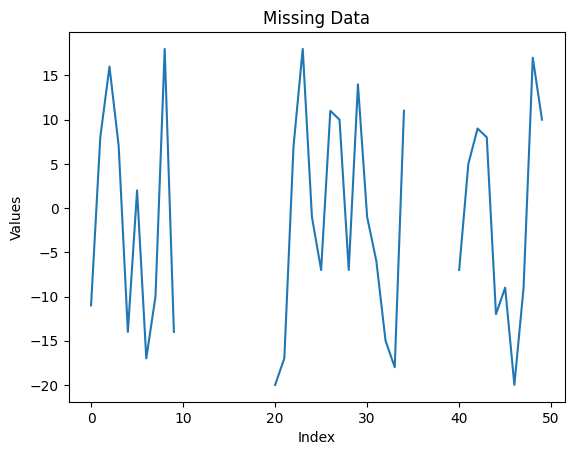

In [149]:
ints.plot(kind="line", xlabel="Index", ylabel="Values", title="Missing Data")

<Axes: title={'center': 'Missing Data'}, xlabel='Index', ylabel='Values'>

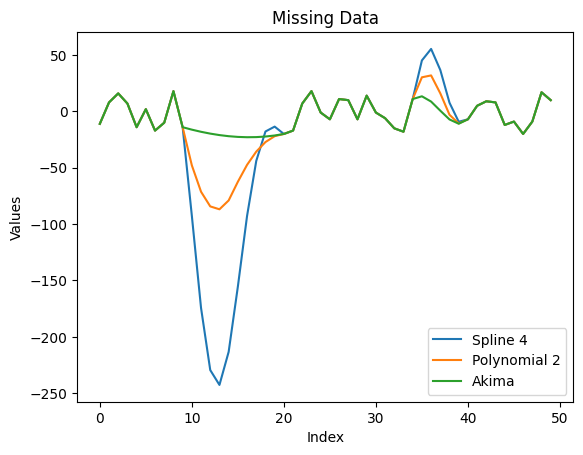

In [150]:
# Methods = time, linear, quadratic, cubic, polynomial, spline, barycentric, pchip, akima
int1 = ints.interpolate(method="spline",order=4)
int2 = ints.interpolate(method="polynomial",order=2)
int3 = ints.interpolate(method="akima")
intdf = pd.DataFrame({"Spline 4":int1, "Polynomial 2":int2, "Akima":int3})
# intdf.head()
intdf.plot(kind="line", xlabel="Index", ylabel="Values", title="Missing Data", legend=True)

<p style="font-size:15px"><b>6. Replacing</b></p>

In [155]:
mydf1 = pd.DataFrame(np.random.rand(20,4).round(1)*10,columns=list("ABCD"), dtype="int32")
mydf2 = mydf1.replace({"A":0, "B":5}, 50)
mydf2.head(10)

,A,B,C,D
0,8,6,7,7
1,50,50,4,9
2,3,3,7,1
3,7,7,2,7
4,4,50,9,3
5,8,8,2,9
6,9,9,8,3
7,3,1,3,10
8,4,50,5,6
9,9,3,4,6


<Axes: >

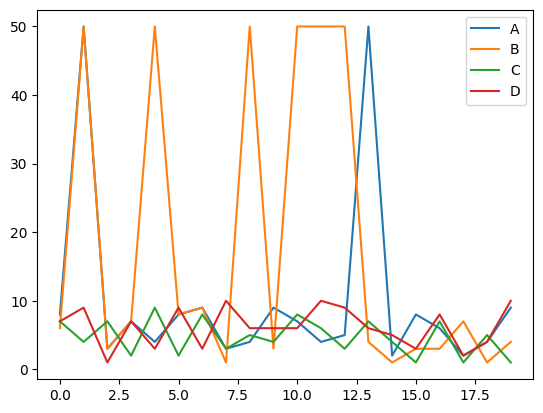

In [156]:
mydf2.plot()

<p style="font-size:15px"><b>6. Pandas Regex</b></p>

In [157]:
userdata = pd.DataFrame({
    "Username" : ["Mark", "John", "Sara", "Alex", "Elisa"],
    "Phone" : ["12345678", "12398564", "012345", "1s23k447*", "pho"],
    "Email" : ["mark123_gmail.com", "joHn.a1@yahoo.com", "5sara@outlook.net", "sdfgh123khg", "elisa-abc123@gmail.com"]
})

userdata

,Username,Phone,Email
0,Mark,12345678,mark123_gmail.com
1,John,12398564,joHn.a1@yahoo.com
2,Sara,012345,5sara@outlook.net
3,Alex,1s23k447*,sdfgh123khg
4,Elisa,pho,elisa-abc123@gmail.com


<ul><li style="color:#218c74;font-size:20px">Find all records with invalid email address format</li></ul>

In [158]:
email_pattern = r'\b[A-Za-z][A-Za-z0-9._-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,7}\b'
userdata[userdata["Email"].str.fullmatch(email_pattern)]

,Username,Phone,Email
1,John,12398564,joHn.a1@yahoo.com
4,Elisa,pho,elisa-abc123@gmail.com


<ul><li style="color:#218c74;font-size:20px">Find all records with invalid phone number format</li></ul>

In [159]:
phone_pattern = r'^[0-9]{8}$'
userdata[userdata["Phone"].str.fullmatch(phone_pattern)]

,Username,Phone,Email
0,Mark,12345678,mark123_gmail.com
1,John,12398564,joHn.a1@yahoo.com


<p id="10" style="font-size:20px;color:white;padding:10px;background:linear-gradient(to right,#0652DD,transparent);text-shadow:0px 0px 5px black;"><b>10. Multi Indexing (Advanced Indexing)</b></p>

<ul><li style="color:#218c74;font-size:20px">Multi Indexing frop tuples or lists</li></ul>

In [160]:
arrays = [
    ["Benz", "Benz", "BMW", "BMW", "Ferrari", "Ferrari", "Lamborghini", "Lamborghini"],
    ["black", "white", "black", "white", "black", "white", "black", "white"],
]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=["Brand", "Color"])
s = pd.Series(np.random.rand(8).round(4)*100, index=index, name="Rating")
s

Brand        Color
Benz         black     1.67
             white    56.51
BMW          black    40.29
             white    44.76
Ferrari      black    83.07
             white     6.33
Lamborghini  black    11.18
             white    18.93
Name: Rating, dtype: float64

<ul><li style="color:#218c74;font-size:20px">Multi Indexing from production</li></ul>

In [161]:
iterables = [["Benz","BMW","Ferrari","Lamborghini"],["Black","White"]]
index = pd.MultiIndex.from_product(iterables, names=["Brand", "Color"])
s = pd.Series(np.random.rand(8).round(4)*100, index=index, name="Rating")
s

Brand        Color
Benz         Black    87.73
             White    27.25
BMW          Black    49.98
             White    73.88
Ferrari      Black    69.27
             White    57.52
Lamborghini  Black    51.15
             White    75.88
Name: Rating, dtype: float64

<p id="11" style="font-size:20px;color:white;padding:10px;background:linear-gradient(to right,#0652DD,transparent);text-shadow:0px 0px 5px black;"><b>11. Reshaping and Pivot Tables </b></p>

<p style="font-size:15px"><b>1. pivot() & pivot_table()</b></p>

<img style="border:1px solid black;width:70%;float:left" src="../images/reshaping_pivot.png">

In [162]:
# pivot, pivot_table() => unique labels, ununique labels

data = {
   "value": range(12),
   "variable": ["A"] * 3 + ["B"] * 3 + ["C"] * 3 + ["D"] * 3,
   "date": pd.to_datetime(["2020-01-03", "2020-01-04", "2020-01-05"] * 4),
   "vars": ["X", "Y", "Z"] * 4
}

wdf = pd.DataFrame(data)

pivoted = wdf.pivot(index="date", columns="variable", values="value")

pivoted

variable,A,B,C,D
date,,,,
2020-01-03,0,3,6,9
2020-01-04,1,4,7,10
2020-01-05,2,5,8,11


In [167]:
import datetime

wdf = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 6,
        "B": ["x", "y", "z"] * 8,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 4,
        "D": (np.random.randn(24)*10).astype("int"),
        "E": (np.random.randn(24)*10).astype("int"),
        "F": [datetime.datetime(2013, i, 1) for i in range(1, 13)]
        + [datetime.datetime(2013, i, 15) for i in range(1, 13)],
    }
)
wdf

,A,B,C,D,E,F
0,one,x,foo,-16,-18,2013-01-01
1,one,y,foo,15,-4,2013-02-01
2,two,z,foo,0,4,2013-03-01
3,three,x,bar,-2,0,2013-04-01
4,one,y,bar,-5,-17,2013-05-01
5,one,z,bar,3,-10,2013-06-01
6,two,x,foo,-1,-13,2013-07-01
7,three,y,foo,-16,2,2013-08-01
8,one,z,foo,-12,7,2013-09-01
9,one,x,bar,-8,0,2013-10-01


In [169]:
pd.pivot_table(
    wdf, values="E",
    index=["B", "C"],
    columns=["A"],
    margins=True,
    aggfunc=["sum", "mean"],
)

sum                       mean                        
A         one three   two All        one      three   two    All
B   C                                                           
x   bar   1.0  -8.0   NaN  -7   0.500000  -4.000000   NaN -1.750
    foo -14.0   NaN -22.0 -36  -7.000000        NaN -11.0 -9.000
y   bar -31.0   NaN  13.0 -18 -15.500000        NaN   6.5 -4.500
    foo   6.0  -3.0   NaN   3   3.000000  -1.500000   NaN  0.750
z   bar  -9.0 -24.0   NaN -33  -4.500000 -12.000000   NaN -8.250
    foo   1.0   NaN  15.0  16   0.500000        NaN   7.5  4.000
All     -46.0 -35.0   6.0 -75  -3.833333  -5.833333   1.0 -3.125

<p style="font-size:15px"><b>2. stack() & unstack()</b></p>

In [170]:
tuples = [
   ["black", "black", "white", "white", "blue", "blue", "green", "green"],
   ["one", "two", "one", "two", "one", "two", "one", "two"],
]

index = pd.MultiIndex.from_arrays(tuples, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=["A", "B", "C"])

sub_df = df[:4]

sub_df

A         B         C
first second                              
black one    -0.370416 -0.166581  1.033658
      two    -0.062056  0.308137  1.298607
white one     0.563363 -0.074914  0.883341
      two    -0.374938 -0.627392  1.814208

<img style="border:1px solid black;width:70%;float:left" src="../images/reshaping_stack.png">

In [173]:
# When "future_stack" is True, dropna and sort have no impact on the result and must remain unspecified
stacked = sub_df.stack(future_stack=True)
stacked

first  second   
black  one     A   -0.370416
               B   -0.166581
               C    1.033658
       two     A   -0.062056
               B    0.308137
               C    1.298607
white  one     A    0.563363
               B   -0.074914
               C    0.883341
       two     A   -0.374938
               B   -0.627392
               C    1.814208
dtype: float64

<img style="border:1px solid black;width:70%;float:left" src="../images/reshaping_unstack.png">

In [174]:
stacked.unstack()

A         B         C
first second                              
black one    -0.370416 -0.166581  1.033658
      two    -0.062056  0.308137  1.298607
white one     0.563363 -0.074914  0.883341
      two    -0.374938 -0.627392  1.814208

In [175]:
stacked.unstack(0) # stacked.unstack("first")

first        black     white
second                      
one    A -0.370416  0.563363
       B -0.166581 -0.074914
       C  1.033658  0.883341
two    A -0.062056 -0.374938
       B  0.308137 -0.627392
       C  1.298607  1.814208

In [176]:
stacked.unstack(1) # stacked.unstack("second")

second        one       two
first                      
black A -0.370416 -0.062056
      B -0.166581  0.308137
      C  1.033658  1.298607
white A  0.563363 -0.374938
      B -0.074914 -0.627392
      C  0.883341  1.814208

<p style="font-size:15px"><b>3. melt()</b></p>

<img style="border:1px solid black;width:70%;float:left" src="../images/reshaping_melt.png">

In [177]:
cheese = pd.DataFrame(
    {
        "first": ["John", "Mary"],
        "last": ["Doe", "Bo"],
        "height": [5.5, 6.0],
        "weight": [130, 150],
    }
)

cheese

,first,last,height,weight
0,John,Doe,5.5,130
1,Mary,Bo,6.0,150


In [178]:
cheese.melt(id_vars=["first", "last"])

,first,last,variable,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


In [179]:
cheese.melt(id_vars=["first", "last"], var_name="quantity")

,first,last,quantity,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


<p style="font-size:15px"><b>4. wide_to_long()</b></p>

In [180]:
dft = pd.DataFrame(
    {
        "A2010": {0: "a", 1: "b", 2: "c"},
        "A2020": {0: "d", 1: "e", 2: "f"},
        "B2010": {0: 2.5, 1: 1.2, 2: 0.7},
        "B2020": {0: 3.2, 1: 1.3, 2: 0.1},
        "X": dict(zip(range(3), np.random.randn(3))),
    }
)

dft["id"] = dft.index

dft

,A2010,A2020,B2010,B2020,X,id
0,a,d,2.5,3.2,2.943952,0
1,b,e,1.2,1.3,-1.027074,1
2,c,f,0.7,0.1,0.250299,2


In [181]:
pd.wide_to_long(dft, ["A", "B"], i="id", j="year")

,,X,A,B
id,year,,,
0,2010,2.943952,a,2.5
1,2010,-1.027074,b,1.2
2,2010,0.250299,c,0.7
0,2020,2.943952,d,3.2
1,2020,-1.027074,e,1.3
2,2020,0.250299,f,0.1


<p id="12" style="font-size:20px;color:white;padding:10px;background:linear-gradient(to right,#0652DD,transparent);text-shadow:0px 0px 5px black;"><b>12. Combining Series and Dataframes</b></p>

<p style="font-size:15px"><b>1. Concatenation</b></p>

<ul><li style="color:#218c74;font-size:20px">Concatenate dataframes together</li></ul>

In [5]:
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)

df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
)

df3 = pd.DataFrame(
    {
        "A": ["A8", "A9", "A10", "A11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
        "D": ["D8", "D9", "D10", "D11"],
    },
    index=[8, 9, 10, 11],
)

frames = [df1, df2, df3]

result = pd.concat(frames)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


<ul><li style="color:#218c74;font-size:20px">Concatenate dataframes together by keys</li></ul>

In [183]:
result = pd.concat(frames, keys=["x", "y", "z"])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

<ul><li style="color:#218c74;font-size:20px">Locate a sub-dataframe by key</li></ul>

In [184]:
result.loc["y"]

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


<ul><li style="color:#218c74;font-size:20px">Concatenate dataframes together horizontaly</li></ul>

In [6]:
result = pd.concat(frames, keys=["x", "y", "z"], axis=1)
result

x                   y                   z               
      A    B    C    D    A    B    C    D    A    B    C    D
0    A0   B0   C0   D0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1    A1   B1   C1   D1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2    A2   B2   C2   D2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3    A3   B3   C3   D3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4   NaN  NaN  NaN  NaN   A4   B4   C4   D4  NaN  NaN  NaN  NaN
5   NaN  NaN  NaN  NaN   A5   B5   C5   D5  NaN  NaN  NaN  NaN
6   NaN  NaN  NaN  NaN   A6   B6   C6   D6  NaN  NaN  NaN  NaN
7   NaN  NaN  NaN  NaN   A7   B7   C7   D7  NaN  NaN  NaN  NaN
8   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   A8   B8   C8   D8
9   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   A9   B9   C9   D9
10  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  A10  B10  C10  D10
11  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  A11  B11  C11  D11

<ul><li style="color:#218c74;font-size:20px">Concatenate dataframes together horizontally using outer-join (Default)</li></ul>

In [186]:
df4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
    },
    index=[2, 3, 6, 7],
)

result = pd.concat([df1, df4], axis=1) # join="outer"
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


<ul><li style="color:#218c74;font-size:20px">Concatenate dataframes together horizontally using inner-join</li></ul>

In [187]:
result = pd.concat([df1, df4], axis=1, join="inner")
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


<p style="font-size:15px"><b>2. Merge</b></p>

<ul><li style="color:#218c74;font-size:20px">Merge dataframes together using inner-join (Default)</li></ul>

In [29]:
left = pd.DataFrame(
    {
        "key1": ["X", "X", "Y", "Z"],
        "key2": ["X", "Y", "X", "Y"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)
left

,key1,key2,A,B
0,X,X,A0,B0
1,X,Y,A1,B1
2,Y,X,A2,B2
3,Z,Y,A3,B3


In [28]:
right = pd.DataFrame(
    {
        "key1": ["X", "Y", "Y", "Z"],
        "key2": ["X", "X", "X", "X"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)
right

,key1,key2,C,D
0,X,X,C0,D0
1,Y,X,C1,D1
2,Y,X,C2,D2
3,Z,X,C3,D3


In [30]:
result = pd.merge(left, right, on=["key1", "key2"]) # how="inner"
result

,key1,key2,A,B,C,D
0,X,X,A0,B0,C0,D0
1,Y,X,A2,B2,C1,D1
2,Y,X,A2,B2,C2,D2


<ul><li style="color:#218c74;font-size:20px">Merge dataframes together using left-join</li></ul>

In [31]:
result = pd.merge(left, right, how="left", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,X,X,A0,B0,C0,D0
1,X,Y,A1,B1,NaN,NaN
2,Y,X,A2,B2,C1,D1
3,Y,X,A2,B2,C2,D2
4,Z,Y,A3,B3,NaN,NaN


<ul><li style="color:#218c74;font-size:20px">Merge dataframes together using right-join</li></ul>

In [32]:
result = pd.merge(left, right, how="right", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,X,X,A0,B0,C0,D0
1,Y,X,A2,B2,C1,D1
2,Y,X,A2,B2,C2,D2
3,Z,X,NaN,NaN,C3,D3


<ul><li style="color:#218c74;font-size:20px">Merge dataframes together using outer-join</li></ul>

In [33]:
result = pd.merge(left, right, how="outer", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,X,X,A0,B0,C0,D0
1,X,Y,A1,B1,NaN,NaN
2,Y,X,A2,B2,C1,D1
3,Y,X,A2,B2,C2,D2
4,Z,Y,A3,B3,NaN,NaN
5,Z,X,NaN,NaN,C3,D3


<ul><li style="color:#218c74;font-size:20px">Merge dataframes together using cross-join</li></ul>

In [34]:
result = pd.merge(left, right, how="cross")
result

,key1_x,key2_x,A,B,key1_y,key2_y,C,D
0,X,X,A0,B0,X,X,C0,D0
1,X,X,A0,B0,Y,X,C1,D1
2,X,X,A0,B0,Y,X,C2,D2
3,X,X,A0,B0,Z,X,C3,D3
4,X,Y,A1,B1,X,X,C0,D0
5,X,Y,A1,B1,Y,X,C1,D1
6,X,Y,A1,B1,Y,X,C2,D2
7,X,Y,A1,B1,Z,X,C3,D3
8,Y,X,A2,B2,X,X,C0,D0
9,Y,X,A2,B2,Y,X,C1,D1


<p style="font-size:15px"><b>3. Join</b></p>

<ul><li style="color:#218c74;font-size:20px">Left-Join dataframes together (Default)</li></ul>

In [35]:
left = pd.DataFrame({
    "A": ["A0", "A1", "A2"],
    "B": ["B0", "B1", "B2"]
    },
    index=["W", "X", "Y"]
)

right = pd.DataFrame({
    "C": ["C0", "C2", "C3"],
    "D": ["D0", "D2", "D3"]
    },
    index=["W", "Y", "Z"]
)

result = left.join(right) # how="left"
result

,A,B,C,D
W,A0,B0,C0,D0
X,A1,B1,NaN,NaN
Y,A2,B2,C2,D2


<ul><li style="color:#218c74;font-size:20px">Outer-Join dataframes together</li></ul>

In [36]:
result = left.join(right, how="outer")
result

,A,B,C,D
W,A0,B0,C0,D0
X,A1,B1,NaN,NaN
Y,A2,B2,C2,D2
Z,NaN,NaN,C3,D3


<ul><li style="color:#218c74;font-size:20px">Inner-Join dataframes together</li></ul>

In [37]:
result = left.join(right, how="inner")
result

,A,B,C,D
W,A0,B0,C0,D0
Y,A2,B2,C2,D2


<ul><li style="color:#218c74;font-size:20px">Right-Join dataframes together</li></ul>

In [38]:
result = left.join(right, how="right")
result

,A,B,C,D
W,A0,B0,C0,D0
Y,A2,B2,C2,D2
Z,NaN,NaN,C3,D3


<ul><li style="color:#218c74;font-size:20px">Cross-Join dataframes together</li></ul>

In [39]:
result = left.join(right, how="cross")
result

,A,B,C,D
0,A0,B0,C0,D0
1,A0,B0,C2,D2
2,A0,B0,C3,D3
3,A1,B1,C0,D0
4,A1,B1,C2,D2
5,A1,B1,C3,D3
6,A2,B2,C0,D0
7,A2,B2,C2,D2
8,A2,B2,C3,D3


<p style="font-size:15px"><b>4. Compare</b></p>

In [40]:
df_1 = pd.DataFrame(
    {
        "col1": ["a", "a", "b", "b", "a"],
        "col2": [1.0, 2.0, 3.0, np.nan, 5.0],
        "col3": [1.0, 2.0, 3.0, 4.0, 5.0],
    },
    columns=["col1", "col2", "col3"],
)

df_2 = df_1.copy()

df_2.loc[0, "col1"] = "c"

df_2.loc[2, "col3"] = 4.0

df_1.compare(df_2)

col1       col3      
  self other self other
0    a     c  NaN   NaN
2  NaN   NaN  3.0   4.0

In [199]:
df_1.compare(df_2, align_axis=0)

col1  col3
0 self     a   NaN
  other    c   NaN
2 self   NaN   3.0
  other  NaN   4.0

In [200]:
df_1.compare(df_2, keep_shape=True)

col1       col2       col3      
  self other self other self other
0    a     c  NaN   NaN  NaN   NaN
1  NaN   NaN  NaN   NaN  NaN   NaN
2  NaN   NaN  NaN   NaN  3.0   4.0
3  NaN   NaN  NaN   NaN  NaN   NaN
4  NaN   NaN  NaN   NaN  NaN   NaN

In [201]:
df_1.compare(df_2, keep_shape=True, keep_equal=True)

col1       col2       col3      
  self other self other self other
0    a     c  1.0   1.0  1.0   1.0
1    a     a  2.0   2.0  2.0   2.0
2    b     b  3.0   3.0  3.0   4.0
3    b     b  NaN   NaN  4.0   4.0
4    a     a  5.0   5.0  5.0   5.0

<p id="13" style="font-size:20px;color:white;padding:10px;background:linear-gradient(to right,#0652DD,transparent);text-shadow:0px 0px 5px black;"><b>13. Duplicate Labels</b></p>

In [202]:
D1 = pd.DataFrame(np.random.randn(5,3).round(2), index=list("12134"), columns=list("ABC"))
D1

,A,B,C
1,1.22,-0.08,0.76
2,-0.55,-2.82,-0.63
1,0.80,0.98,-0.24
3,-0.95,-0.81,0.81
4,-0.26,-0.46,1.60


<ul><li style="color:#218c74;font-size:20px">Check if a dataframe indexes are unique</li></ul>

In [203]:
D1.index.is_unique

False

<ul><li style="color:#218c74;font-size:20px">Check if a dataframe columns are unique</li></ul>

In [204]:
D1.columns.is_unique

True

<ul><li style="color:#218c74;font-size:20px">Show the duplicate indexes of a dataframe using a boolean mask</li></ul>

In [ ]:
D1.index.duplicated()

<ul><li style="color:#218c74;font-size:20px">Show the duplicate columns of a dataframe using a boolean mask</li></ul>

In [205]:
D1.columns.duplicated()

array([False, False, False])

<p id="14" style="font-size:20px;color:white;padding:10px;background:linear-gradient(to right,#0652DD,transparent);text-shadow:0px 0px 5px black;"><b>14. Data mapping</b></p>

In [228]:
df = pd.read_csv(path)

In [229]:
# map(), filter(), _reduce()
df["Product Name"].map(lambda x: len(str(x))).to_frame().head()

,Product Name
0,50
1,36
2,33
3,48
4,40


<ul><li style="color:#218c74;font-size:20px">Using apply() method</li></ul>

In [230]:
D2 = pd.DataFrame(np.random.rand(10,2).round(2)*10, columns=["A","B"])
D2

,A,B
0,2.6,4.6
1,3.5,4.0
2,6.4,6.5
3,2.2,8.3
4,3.0,9.0
5,6.3,5.0
6,7.1,3.1
7,4.5,1.7
8,6.5,0.9
9,4.0,4.4


In [231]:
D2.apply("sum")

A    46.1
B    47.5
dtype: float64

In [232]:
D2.apply(["sum","mean","max","min","var"])

,A,B
sum,46.100,47.500000
mean,4.610,4.750000
max,7.100,9.000000
min,2.200,0.900000
var,3.321,6.816111


In [233]:
D2.apply(np.cumsum)

,A,B
0,2.6,4.6
1,6.1,8.6
2,12.5,15.1
3,14.7,23.4
4,17.7,32.4
5,24.0,37.4
6,31.1,40.5
7,35.6,42.2
8,42.1,43.1
9,46.1,47.5


In [234]:
D2.apply(lambda x: np.mean(x), axis=0)

A    4.61
B    4.75
dtype: float64

In [235]:
D2.apply(lambda x: np.mean(x), axis=1)

0    3.60
1    3.75
2    6.45
3    5.25
4    6.00
5    5.65
6    5.10
7    3.10
8    3.70
9    4.20
dtype: float64

<ul><li style="color:#218c74;font-size:20px">Using agg() or aggregate() method</li></ul>

In [236]:
D2.agg(["sum","mean","max","min","var"]) # An alias for aggregate()
D2.aggregate(["sum","mean","max","min","var"])

,A,B
sum,46.100,47.500000
mean,4.610,4.750000
max,7.100,9.000000
min,2.200,0.900000
var,3.321,6.816111


In [237]:
D2.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})

,A,B
sum,46.1,NaN
min,2.2,0.9
max,NaN,9.0


In [238]:
D2.agg(x=('A', 'max'), y=('B', 'min'))

,A,B
x,7.1,NaN
y,NaN,0.9


<ul><li style="color:#218c74;font-size:20px">Using transform() method</li></ul>

In [239]:
s = pd.Series(range(10,110,10))
s.transform(lambda x: x**2)

0      100
1      400
2      900
3     1600
4     2500
5     3600
6     4900
7     6400
8     8100
9    10000
dtype: int64

In [240]:
s.transform([np.sqrt, np.exp])

,sqrt,exp
0,3.162278,2.202647e+04
1,4.472136,4.851652e+08
2,5.477226,1.068647e+13
3,6.324555,2.353853e+17
4,7.071068,5.184706e+21
5,7.745967,1.142007e+26
6,8.366600,2.515439e+30
7,8.944272,5.540622e+34
8,9.486833,1.220403e+39
9,10.000000,2.688117e+43


<ul><li style="color:#218c74;font-size:20px">Functions chaining with pipe() method</li></ul>

In [241]:
def F(x, c):
    return (x * 2) + c

def G(x, c):
    return (x ** 2) - c

In [242]:
F(G(D2, c=4), c=5)

,A,B
0,10.52,39.32
1,21.50,29.00
2,78.92,81.50
3,6.68,134.78
4,15.00,159.00
5,76.38,47.00
6,97.82,16.22
7,37.50,2.78
8,81.50,-1.38
9,29.00,35.72


In [243]:
D2.pipe(G, c=4).pipe(F, c=5)

,A,B
0,10.52,39.32
1,21.50,29.00
2,78.92,81.50
3,6.68,134.78
4,15.00,159.00
5,76.38,47.00
6,97.82,16.22
7,37.50,2.78
8,81.50,-1.38
9,29.00,35.72


<p id="15" style="font-size:20px;color:white;padding:10px;background:linear-gradient(to right,#0652DD,transparent);text-shadow:0px 0px 5px black;"><b>15. Grouping</b></p>

In [244]:
grouped_df = df.groupby("Brand")

In [245]:
grouped_df.get_group("Adidas ORIGINALS").head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72
9,Men's adidas Originals Forest Grove Shoes,EE5761,6599,3959,40,Adidas ORIGINALS,4.0,39
10,Women's adidas Originals Swift Run Shoes,EE4553,7599,4559,40,Adidas ORIGINALS,2.7,36
11,Women's adidas Originals Continental Vulc Shoes,EF9315,6599,3959,40,Adidas ORIGINALS,4.2,35


In [246]:
grouped_df = df.groupby(["Brand","Discount"])
grouped_df.first() # last(), nth(7)

Product Name  \
Brand                    Discount                                                      
Adidas Adidas ORIGINALS  50        Women's adidas Originals NMD_Racer Primeknit S...   
Adidas CORE / NEO        0         Women's adidas Sport Inspired Lite Racer 2.0 S...   
                         20                Women's adidas Sport Inspired Drogo Shoes   
                         30              Women's adidas Sport Inspired Archivo Shoes   
                         40                        Women's adidas Swim Puka Slippers   
                         50         Women's adidas Sport Inspired Questar Ride Shoes   
                         60        Women's adidas Sport Inspired Duramo Lite 2.0 ...   
Adidas ORIGINALS         0                    Men's adidas Originals Superstar Shoes   
                         30                     Women's adidas Originals Sleek Shoes   
                         40                Men's adidas Originals Forest Grove Shoes   
                         50                     Women's adidas Originals Sleek Shoes   
                         60        Women's adidas ORIGINALS SUPERSTAR BOUNCE PK L...   
Adidas SPORT PERFORMANCE 0                          Men's Outdoor Ediffin II Sandals   
                         20                       Men's Outdoor Wind Chaser II Shoes   
                         30        Women's adidas by Stella Mccartney Running Ult...   
                         40                 Men's adidas Outdoor Terra Light Sandals   
                         50                     Men's adidas Outdoor Elevate Sandals   
                         60               WoMen's adidas TRAINING CRAZYMOVE TR SHOES   
Nike                     0                            Nike Air Force 1 '07 Essential   

                                   Product ID  Listing Price  Sale Price  \
Brand                    Discount                                          
Adidas Adidas ORIGINALS  50            AH2430          14999        7499   
Adidas CORE / NEO        0             EG3290           3999        3999   
                         20            CL7646           2699        2159   
                         30            EF0451           4999        3499   
                         40            CM0081            999         599   
                         50            B44832           6999        3499   
                         60            B75586           4799        1920   
Adidas ORIGINALS         0             EG4957           7999        7999   
                         30            FV3395           7599        5319   
                         40            EE5761           6599        3959   
                         50            G27341           7599        3799   
                         60            S82260          11999        4800   
Adidas SPORT PERFORMANCE 0             CM5955           2999        2999   
                         20            CM5919           4999        3999   
                         30            EE9574          17999       12599   
                         40            CL9928           3599        2159   
                         50            CK9830           2799        1399   
                         60            CP9514           5999        2400   
Nike                     0         CJ1646-600              0        7495   

                                   Rating  Reviews  
Brand                    Discount                   
Adidas Adidas ORIGINALS  50           4.8       41  
Adidas CORE / NEO        0            2.9       51  
                         20           2.8       49  
                         30           4.6       51  
                         40           2.6       37  
                         50           4.1       35  
                         60           1.0       45  
Adidas ORIGINALS         0            4.9       38  
                         30           4.2        5  
                         40           4.0  

<p id="16" style="font-size:20px;color:white;padding:10px;background:linear-gradient(to right,#0652DD,transparent);text-shadow:0px 0px 5px black;"><b>16. I/O Tools</b></p>

<p style="font-size:19px;color:#2c2c54;text-align:justify;">The pandas I/O API is a set of top level <b style="color:#ffb142">reader</b> functions accessed like <span style="color:#009432">read_csv()</span> that generally return a pandas object.
    The corresponding <b style="color:#ffb142">writer</b> functions are object methods that are accessed like <span style="color:#009432">to_csv()</span>.<br>Pandas can read and write some useful file formats like : csv, json, html, excel, sql, pickle, hdf5, feather and ...</p>

<ul><li style="color:#218c74;font-size:20px">Read dataset from a file</li></ul>

In [9]:
df = pd.read_json("../datasets/user_accounts_data.json")
df.head()

,Firstname,Lastname,Job_Title,State,Address,Email_Address,Phone_Number,Birth
0,Chuck,Simmons,Auditor,Oklahoma,"Tiptree Grove, 4714",Chuck_Simmons117@zynuu.audio,1-643-404-8568,6/13/1975
1,Julianna,Williams,Laboratory Technician,Utah,"Camdale Pass, 9965",Julianna_Williams4593@p5emz.media,1-136-845-7528,1/31/1969
2,Greta,Larsen,Systems Administrator,North Carolina,"Aspen Crossroad, 3622",Greta_Larsen5210@uagvw.app,1-273-478-4383,1/21/1975
3,Kate,Collins,Bookkeeper,New Jersey,"Bigland Walk, 1916",Kate_Collins3130@jcf8v.website,1-163-555-2140,12/12/1964
4,Tom,Yates,Call Center Representative,Ohio,"Abourne Boulevard, 6938",Tom_Yates8263@voylg.space,1-711-711-4627,3/16/1971


<ul><li style="color:#218c74;font-size:20px">Write dataset to a file</li></ul>

In [24]:
df.to_xml("../datasets/user_accounts_data.xml")

<ul><li style="color:#218c74;font-size:20px">Read dataset from a string</li></ul>

In [248]:
from io import StringIO

data = "COL1,COL2,COL3\n#This is a comment\na,b,1\nc,d,2\ne,f,3\ng,h,4\ni,j,5\nk,l,6\nm,n,7"

pd.read_csv(StringIO(data), skiprows=lambda x: x % 2 != 0, dtype={"A": object, "B": object, "C": "Float64"}, comment="#")

,COL1,COL2,COL3
0,a,b,1
1,e,f,3
2,i,j,5
3,m,n,7


<p id="17"style="font-size:20px;color:white;padding:10px;background:linear-gradient(to right,#0652DD,transparent);text-shadow:0px 0px 5px black;"><b>17. The str accessor and string methods</b></p>

<ul><li style="color:#218c74;font-size:20px">Table</li></ul>

In [10]:
req = pd.read_html("../datasets/index.html")
table = req[0]
pd.set_option("display.max_colwidth",200)
left_aligned_table = table.style.set_properties(**{'text-align': 'left'})
left_aligned_table

,Nickname,Age,Salary
0,Bob,25,26500$
1,Alex,30,12000$
2,Sara,32,15000$
3,Joe,21,2000$
4,Niki,40,10000$


<ul><li style="color:#218c74;font-size:20px">Examples :</li></ul>

In [267]:
exdf = pd.DataFrame({"Int":[10,20,30],"Char":["A","B","C"],"Bool":[True,False,True]})
exdf

,Int,Char,Bool
0,10,A,True
1,20,B,False
2,30,C,True


In [268]:
exdf["Bool"] = exdf["Bool"].astype("string").str.upper().str.join("*")
exdf

,Int,Char,Bool
0,10,A,T*R*U*E
1,20,B,F*A*L*S*E
2,30,C,T*R*U*E


<p id="18" style="font-size:20px;color:white;padding:10px;background:linear-gradient(to right,#0652DD,transparent);text-shadow:0px 0px 5px black;"><b>18. Options and Settings</b></p>

<ul><li style="color:#218c74;font-size:20px">List of all available options and their description</li></ul>

In [269]:
pd.describe_option()

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller than the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.date_dayfirst : boolean
    When True, prints an

<ul><li style="color:#218c74;font-size:20px">Getting and setting options (dotted-style)</li></ul>

In [270]:
# Get
pd.options.display.max_rows

60

In [271]:
# Set
pd.options.display.max_rows = 100

<ul><li style="color:#218c74;font-size:20px">Getting and setting options (Pandas API)</li></ul>

In [272]:
pd.get_option("display.max_rows")

100

In [273]:
pd.set_option("display.max_rows", 100)

<ul><li style="color:#218c74;font-size:20px">Reset options to default</li></ul>

In [274]:
pd.reset_option("display.max_rows")

<ul><li style="color:#218c74;font-size:20px">Stylers</li></ul>

In [275]:
df.head()

,Firstname,Lastname,Job Title,State,Address,Email Address,Phone Number,Birth
0,Chuck,Simmons,Auditor,Oklahoma,"Tiptree Grove, 4714",Chuck_Simmons117@zynuu.audio,1-643-404-8568,6/13/1975
1,Julianna,Williams,Laboratory Technician,Utah,"Camdale Pass, 9965",Julianna_Williams4593@p5emz.media,1-136-845-7528,1/31/1969
2,Greta,Larsen,Systems Administrator,North Carolina,"Aspen Crossroad, 3622",Greta_Larsen5210@uagvw.app,1-273-478-4383,1/21/1975
3,Kate,Collins,Bookkeeper,New Jersey,"Bigland Walk, 1916",Kate_Collins3130@jcf8v.website,1-163-555-2140,12/12/1964
4,Tom,Yates,Call Center Representative,Ohio,"Abourne Boulevard, 6938",Tom_Yates8263@voylg.space,1-711-711-4627,3/16/1971


In [10]:
dfStyler = df.head().style.set_properties(**{'text-align' : 'center', 'border' : '1px solid black', 'background':'wheat'})
dfStyler.set_table_styles([dict(selector='th', props=[('text-align', 'center'),('background','black'),('color','white')])])

,Firstname,Lastname,Job_Title,State,Address,Email_Address,Phone_Number,Birth
0,Chuck,Simmons,Auditor,Oklahoma,"Tiptree Grove, 4714",Chuck_Simmons117@zynuu.audio,1-643-404-8568,6/13/1975
1,Julianna,Williams,Laboratory Technician,Utah,"Camdale Pass, 9965",Julianna_Williams4593@p5emz.media,1-136-845-7528,1/31/1969
2,Greta,Larsen,Systems Administrator,North Carolina,"Aspen Crossroad, 3622",Greta_Larsen5210@uagvw.app,1-273-478-4383,1/21/1975
3,Kate,Collins,Bookkeeper,New Jersey,"Bigland Walk, 1916",Kate_Collins3130@jcf8v.website,1-163-555-2140,12/12/1964
4,Tom,Yates,Call Center Representative,Ohio,"Abourne Boulevard, 6938",Tom_Yates8263@voylg.space,1-711-711-4627,3/16/1971


In [15]:
type(dfStyler)

pandas.io.formats.style.Styler

In [300]:
type(df)

pandas.core.frame.DataFrame

<hr style="border: 2px solid black; margin: 100px 0px 50px 0px;">

<p style="font-size:30px;text-align:center"><strong>References</strong></p>
<p style="font-size:20px;text-align:center">To obtain additional information about <strong>pandas</strong>, check out the link below.</p>
<a style="font-size:18px;text-align:center;display:block" href="https://pandas.pydata.org/docs/">Pandas Documents</a>